In [162]:
!pip install python-mnist

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [163]:
import numpy as np
import matplotlib.pyplot as plt
from mnist import MNIST

In [222]:
mnData = MNIST('/content/gdrive/MyDrive/Quantiphi Training/Neural_network_1/Dataset')
X_train,Y_train= mnData.load_training()
X_test,Y_test= mnData.load_testing()

Yt=[]
for i in range(0,10000):
 Yt.append(Y_test[i]);
Y_test=Yt

Y_test=np.reshape(Y_test,(10000,1));
Y_train=np.reshape(Y_train,(60000,1));


X_train=np.transpose(X_train)
X_test=np.transpose(X_test)

In [223]:
print(np.shape(X_train))
print(np.shape(Y_train))
print(np.shape(Y_test))
print(np.shape(X_test))

(784, 60000)
(60000, 1)
(10000, 1)
(784, 10000)


In [224]:

Y=np.zeros(shape=(10,60000))
for i in range(0,60000):
  Y[Y_train[i,0],i]=1;
print(Y[:,200])

Yti=np.zeros(shape=(10,10000));
for i in range(0,10000):
  Yti[Y_test[i,0],i]=1;
print(Yti[:,200])

print(Y.shape)
print(Yti.shape)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
(10, 60000)
(10, 10000)


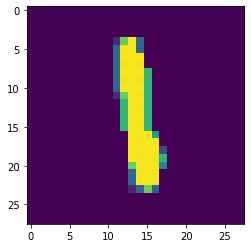

In [225]:
#after reshaping just to check

X_train= np.reshape(X_train,(28,28,60000))
img=X_train[:,:,200]
plt.imshow(img)
plt.show()
X_train=np.reshape(X_train,(784,60000))

All initializations and function definitions

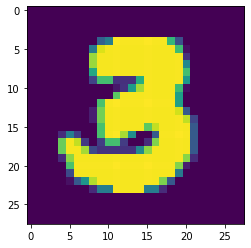

In [226]:
X_test=np.reshape(X_test,(28,28,10000))
img=X_test[:,:,200]
plt.imshow(img)
plt.show()
X_test=np.reshape(X_test,(784,10000));

In [227]:
#input X for all training examples So(n[0]xm dimension)
X_train=X_train;
A0=X_train;



#n[1] =250 i.e. 250 neurons in the first hidden layer
#n[2]=10 i.e. output layer with 9 neurons

#all the weights for conection between input and first hidden layer (for a particular gradient descennt iteration) So dimension n[1]xn[0]
W1=np.random.randn(250,784)*0.01;
W2=np.random.randn(10,250)*0.01;

#Similarly all biases for 1st hidden layer (for a particular gradient descennt iteration) so dimension n[1]x1

B1=np.zeros(shape=(250,1));
B2=np.zeros(shape=(10,1));


#sigmoid function and its derivative
def sigmoid(x):
  return 1/(1+np.exp(-x));

def dSigmoid(x):
  return sigmoid(x)*(1-sigmoid(x));

#softmax
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x),axis=0);   

# in the notaion i represents the ith iterration of gradeient descent and j denotes the jth layer of the neural network j_1 means j-1
def forwardPropagation(x,w1,w2,b1,b2):
  z1=np.dot(w1,x)+b1; 
  a1=sigmoid(z1);
  z2=np.dot(w2,a1)+b2;
  a2=softmax(z2);
  return a2,a1,z2,z1;

#loss function for logistic output
def loss(a,y):
  return -1*np.sum(y*np.log(a),axis=0);

# cross categorical entropy

#cost calculation
def computeCost(A,Y):
  l=loss(A,Y);
  return np.sum(l)/60000;


#Learning rate 0.03
alpha=0.03;
costList=[];

Code below this is one single iteration of gradient descent 

In [252]:
epochs=360;

for i in range(0,epochs):
  
  #forward propogation for both layers
  A2,A1,Z2,Z1=forwardPropagation(X_train,W1,W2,B1,B2);


  cost=computeCost(A2,Y);
  costList.append(cost);

  #only derivatives wrt W and B are important to get gradient vector.
  
  dZ2=A2-Y;                                      #(10,60000)
  dW2=np.dot(dZ2,A1.T)/60000;                    #(10,250)==(10,60000)x(60000,250)
  dB2=np.sum(dZ2,axis=1,keepdims=1)/60000;       #(10,1)


 
  p=np.dot(W2.T,dZ2);                             #(250x10) (10,60000)== (250,60000)
  dZ1=p*dSigmoid(A1);                             #(250,60000)
  dW1=np.dot(dZ1,X_train.T)/60000;                #(250,784)
  dB1=np.sum(dZ1,axis=1,keepdims=1)/60000;        #(250,1)


  #So basicallly now we know the gradient of costfunction
  #We can update all weights and biases now.

  W1-=alpha*dW1;     
  W2-=alpha*dW2;
  B1-=alpha*dB1;
  B2-=alpha*dB2;


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


Now to the testing Part

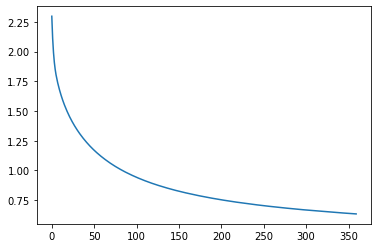

In [253]:
i=np.linspace(0,360,num=360,endpoint=False);
plt.plot(i,costList);
plt.show()

In [265]:
A2,A1,Z2,Z1=forwardPropagation(X_test,W1,W2,B1,B2); #predicting outputs for all training examples for testing

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


In [297]:
#calculating accuracy
correct=0;

for i in range(0,10000):     
  if(np.argmax(Yti[:,i])==np.argmax(A2[:,i])):
    correct+=1;
print(correct/10000*100)


84.43


Finally just checking for a random testing example

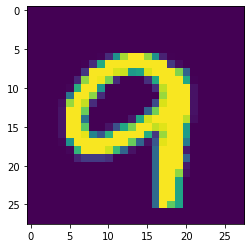

In [295]:
X_test=np.reshape(X_test,(28,28,10000))
img=X_test[:,:,501]
plt.imshow(img)
plt.show()
X_test=np.reshape(X_test,(784,10000));

In [296]:
np.argmax(A2[:,501])

9